In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import LabelEncoder


In [2]:
 df1 = pd.read_csv(r'C:\Users\HP\Desktop\Phase 1\diabetes.csv' )
df2 = pd.read_csv(r'C:\Users\HP\Desktop\Phase 1\diabetes1.csv' )

In [3]:
m_df = pd.concat([df1, df2], axis=0)
m_df.shape

(2768, 9)

In [4]:
m_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 216.2 KB


In [6]:
m_df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction' ]] = m_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction' ]].replace(0,np.NaN)

In [7]:
m_df.isnull().sum()

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [8]:
m_df['Glucose'].fillna(m_df['Glucose'].mean(), inplace=True)
m_df ['BloodPressure'].fillna(m_df['BloodPressure'].mean(),inplace = True)
m_df['SkinThickness'].fillna(m_df['SkinThickness'].mean(), inplace = True)
m_df['Insulin'].fillna(m_df['Insulin'].mean(), inplace = True)
m_df['BMI'].fillna(m_df['BMI'].mean(), inplace = True)

In [9]:
m_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
m_df.to_csv("merged_diabetes_data.csv", index = False)
df = pd.read_csv("merged_diabetes_data.csv")
df.shape

(2768, 9)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,154.23783,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,154.23783,26.6,0.351,31,0
2,8,183.0,64.0,29.289634,154.23783,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.00000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.00000,43.1,2.288,33,1


In [ ]:
## Visialization

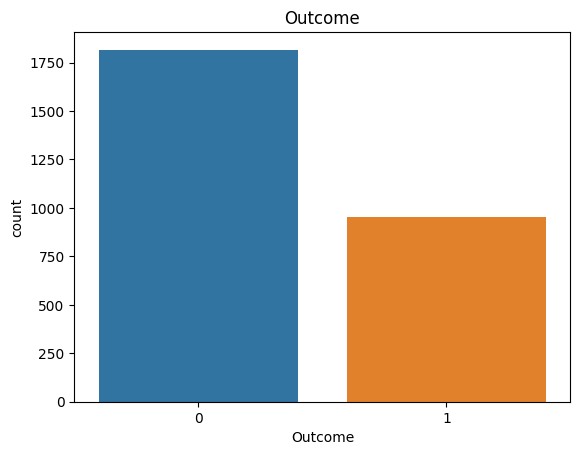

In [13]:
sns.countplot(data = df, x = 'Outcome')
plt.title("Outcome")
plt.show()

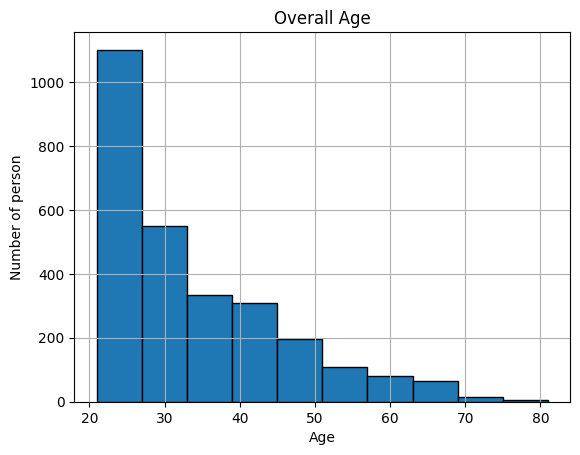

In [14]:
df["Age"].hist(edgecolor = "black");
plt.title("Overall Age")
plt.xlabel("Age")
plt.ylabel("Number of person")
plt.show()

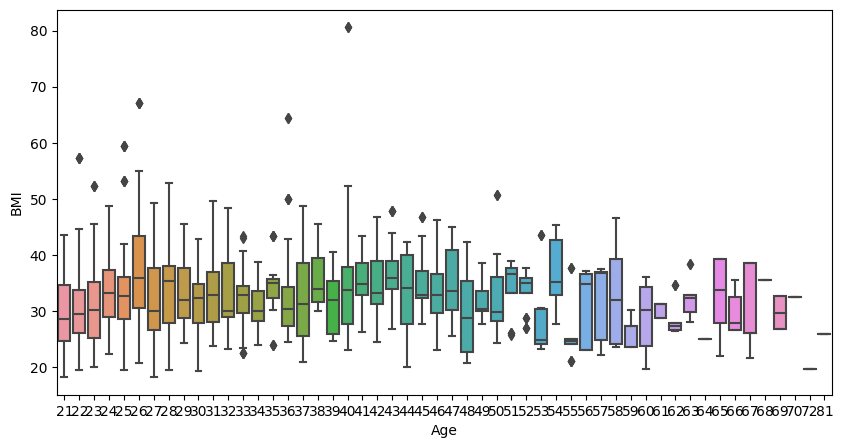

In [15]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='Age', y='BMI', data=df)
plt.show()

In [16]:
m_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.123213,0.200860,0.086211,0.054814,0.013862,-0.027731,0.540805,0.223796
Glucose,0.123213,1.000000,0.204630,0.204168,0.410280,0.232194,0.127760,0.261631,0.489335
BloodPressure,0.200860,0.204630,1.000000,0.200212,0.073038,0.265114,0.007852,0.323675,0.172116
SkinThickness,0.086211,0.204168,0.200212,1.000000,0.173250,0.524172,0.094273,0.131754,0.208093
Insulin,0.054814,0.410280,0.073038,0.173250,1.000000,0.181275,0.096865,0.103331,0.209610
BMI,0.013862,0.232194,0.265114,0.524172,0.181275,1.000000,0.145022,0.020287,0.290028
DiabetesPedigreeFunction,-0.027731,0.127760,0.007852,0.094273,0.096865,0.145022,1.000000,0.028544,0.160664
Age,0.540805,0.261631,0.323675,0.131754,0.103331,0.020287,0.028544,1.000000,0.237050
Outcome,0.223796,0.489335,0.172116,0.208093,0.209610,0.290028,0.160664,0.237050,1.000000


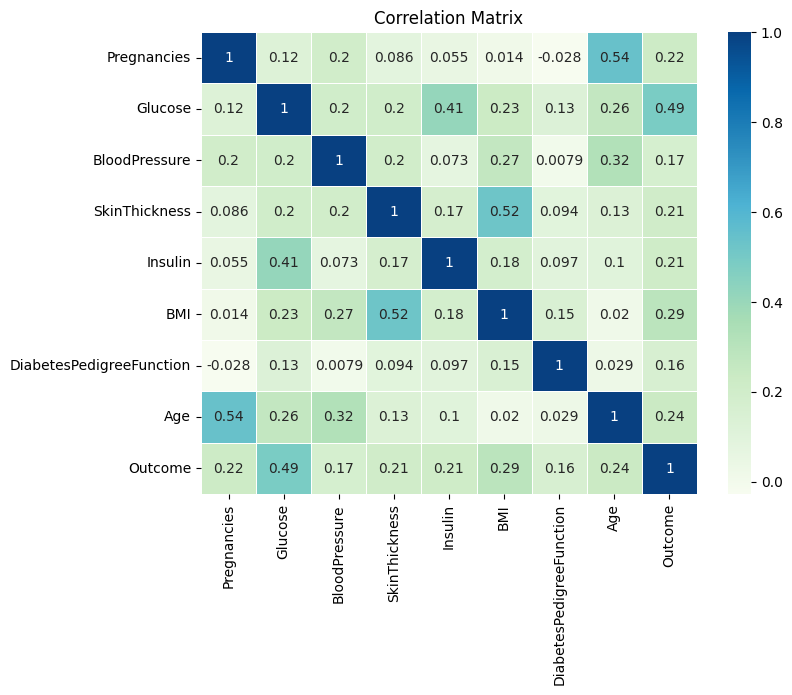

In [17]:
plt.subplots(figsize=(8,6))
sns.heatmap(m_df.corr(), cmap="GnBu", annot=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21696\1777708639.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, j+1)


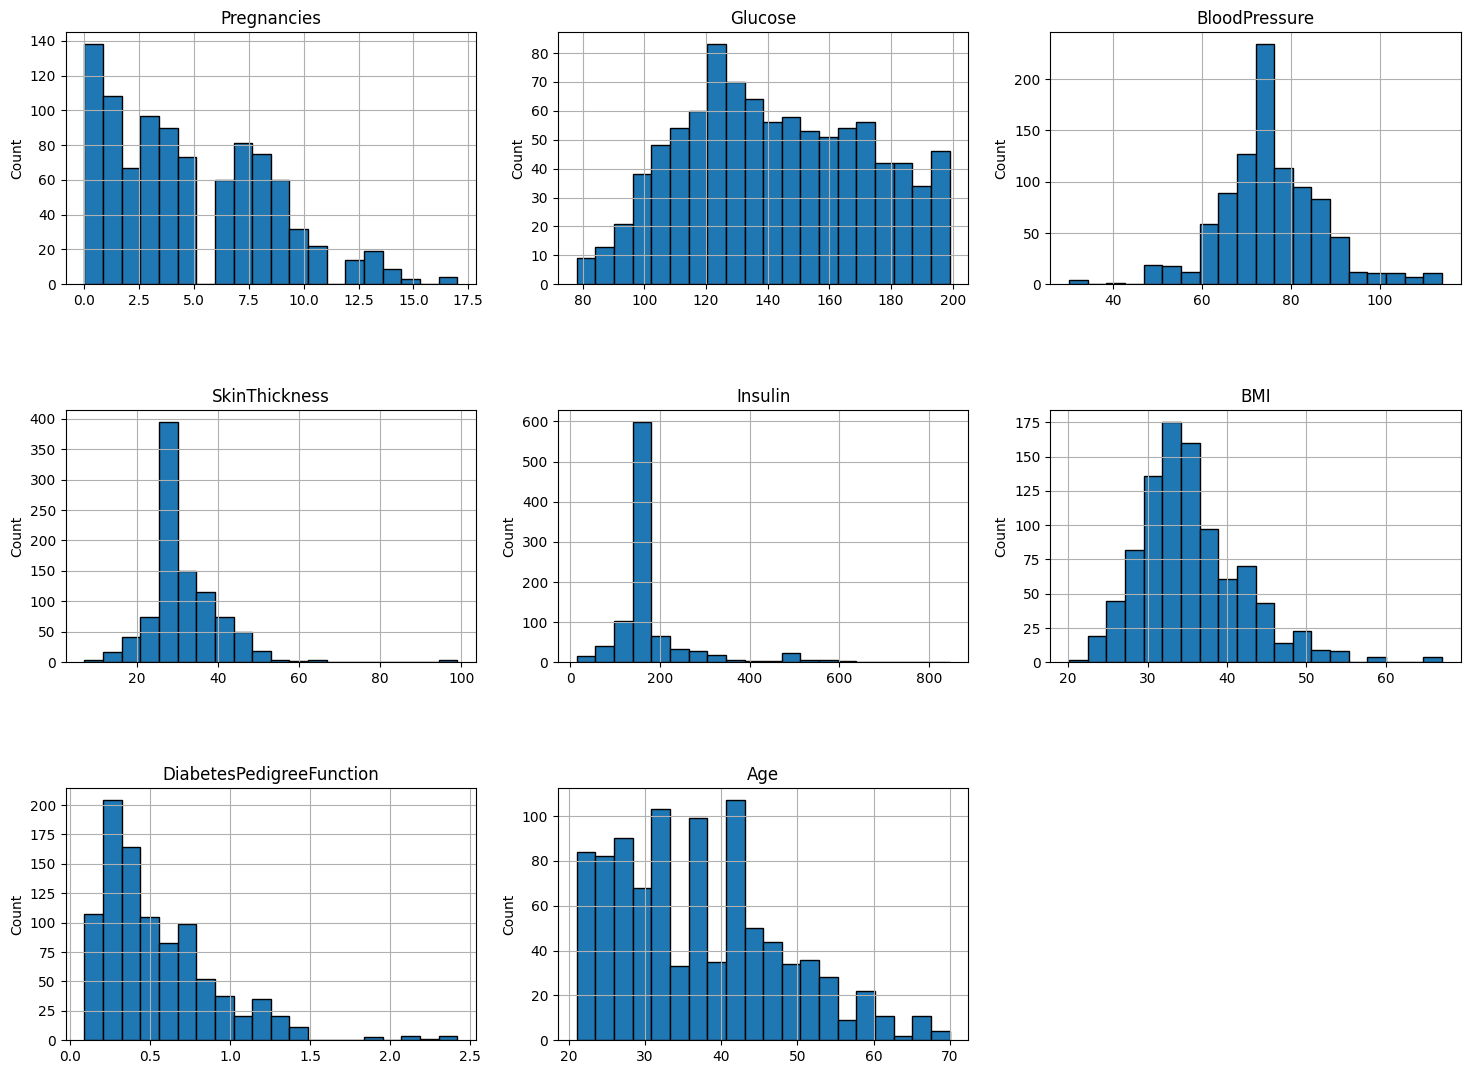

In [18]:
data1 = df[df["Outcome"]==1]
columns = df.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4, 3, j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21696\2404308983.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 3, j+1)


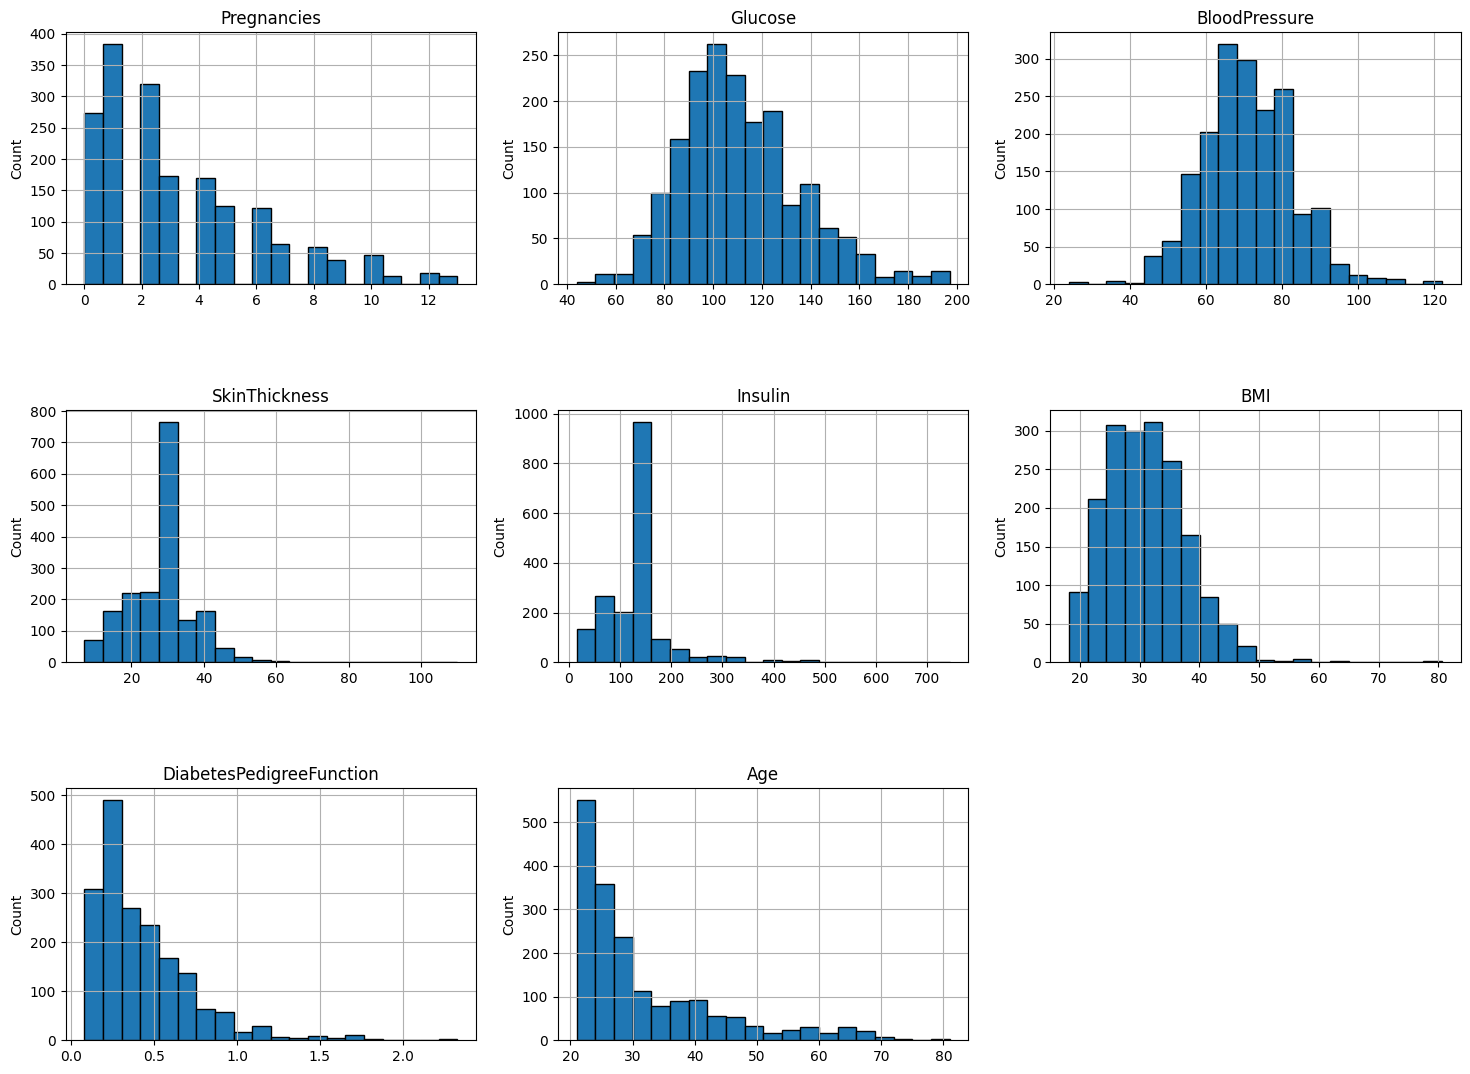

In [19]:
data1 = df[df["Outcome"]==0]
columns = df.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4, 3, j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


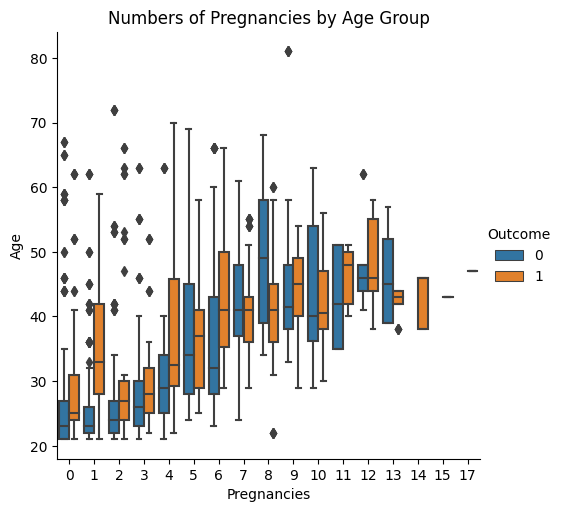

In [20]:
sns.catplot(x="Pregnancies", y="Age", hue="Outcome", kind="box", data=df);
plt.title("Numbers of Pregnancies by Age Group")
plt.show()


In [21]:
x = df.drop(['Outcome'], axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,154.23783,33.6,0.627,50
1,1,85.0,66.0,29.000000,154.23783,26.6,0.351,31
2,8,183.0,64.0,29.289634,154.23783,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.00000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.00000,43.1,2.288,33


In [22]:
y=df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
##Standard scaler

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
#LOGISTIC REGRESSION

In [26]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
logistic_pred = model1.predict(x_test)

In [27]:
print("Model Score is  :",model1.score(x_train,y_train)) 
print("ACC Score is : ",accuracy_score(y_test,logistic_pred))
print("Test Accuracy {}".format(model1.score(x_test,y_test))) 

Model Score is  : 0.7702632937532267
ACC Score is :  0.7749699157641395
Test Accuracy 0.7749699157641395


In [28]:
cm = confusion_matrix(y_test,logistic_pred)
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       562
           1       0.71      0.52      0.60       269

    accuracy                           0.77       831
   macro avg       0.75      0.71      0.72       831
weighted avg       0.77      0.77      0.76       831



In [29]:
LRf1 = f1_score(y_test, logistic_pred, average='weighted') 
print ("F1_score is : ", LRf1)

F1_score is :  0.7645487685913344


In [30]:
print(cm)

[[504  58]
 [129 140]]


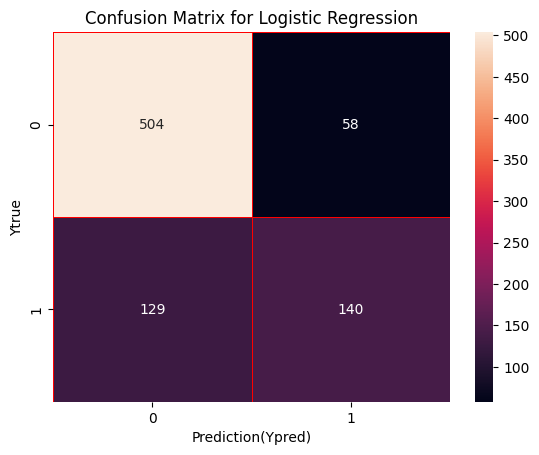

In [31]:
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
#RANDOM_FOREST

In [72]:
model2= RandomForestClassifier(n_estimators = 82, random_state=42)
model2.fit(x_train, y_train)
random_pred = model2.predict(x_test)

In [33]:
print("Model Score is :",model2.score(x_train,y_train)) 
print("ACC Score is : ",accuracy_score(y_test,random_pred))
print("Test Accuracy {}".format(model2.score(x_test,y_test))) 

Model Score is : 1.0
ACC Score is :  0.9711191335740073
Test Accuracy 0.9711191335740073


In [75]:
cm1 = confusion_matrix(y_test,random_pred)
print(classification_report(y_test, random_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       562
           1       0.94      0.97      0.96       269

    accuracy                           0.97       831
   macro avg       0.96      0.97      0.97       831
weighted avg       0.97      0.97      0.97       831



In [76]:
print(cm1)

[[546  16]
 [  8 261]]


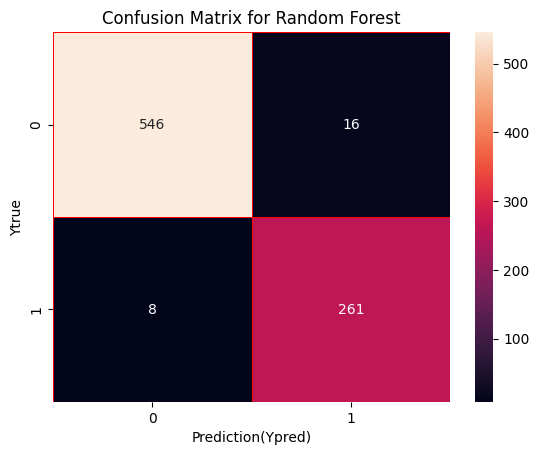

In [77]:
sns.heatmap(cm1,annot = True, linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
#SVM

In [38]:
model3 = SVC(kernel="rbf", gamma="scale", C=100)
model3.fit(x_train, y_train)
svc_pred = model3.predict(x_test)

In [39]:
print("Model Score is :",model3.score(x_train,y_train)) 
print("ACC Score is : ",accuracy_score(y_test, svc_pred))
print("Test Accuracy {}".format(model3.score(x_test,y_test))) 

Model Score is : 0.9736706246773361
ACC Score is :  0.9253910950661853
Test Accuracy 0.9253910950661853


In [40]:
mae = mean_absolute_error(y_test, svc_pred)
print("MAE:", mae)

MAE: 0.07460890493381468


In [41]:
cm2 = confusion_matrix (y_test, svc_pred)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       562
           1       0.88      0.90      0.89       269

    accuracy                           0.93       831
   macro avg       0.91      0.92      0.92       831
weighted avg       0.93      0.93      0.93       831



In [42]:
SVC1=round(f1_score(y_test, svc_pred, average='weighted') ,3)
print ("F1_score is : ", SVC1)

F1_score is :  0.926


In [43]:
print(cm2)

[[528  34]
 [ 28 241]]


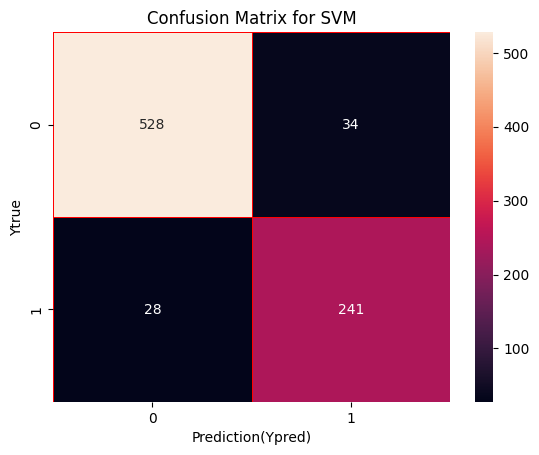

In [44]:
sns.heatmap(cm2,annot = True, linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confusion Matrix for SVM")
plt.show()

In [ ]:
##check 

In [45]:
patient = np.array([[ 1., 150., 70., 45., 0., 40., 1.5, 25]])
    
patient = scaler.transform(patient)
    


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
model1.predict(patient)


logistic_pred = model3.predict(patient)
result = logistic_pred[0]  

if result == 1:
    print('DIABETES')
else:
    print('NO DIABETES')

NO DIABETES


In [47]:
model2.predict(patient)

random_pred = model3.predict(patient)
result = random_pred[0]  

if result == 1:
    print('DIABETES')
else:
    print('NO DIABETES')

NO DIABETES


In [48]:
model3.predict(patient)

svc_pred = model3.predict(patient)
result = svc_pred[0]  

if result == 1:
    print('DIABETES')
else:
    print('NO DIABETES')

NO DIABETES


In [ ]:
#predict Severity Level

In [49]:
true_df = df[y==1]
true_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,154.23783,33.6,0.627,50,1
2,8,183.0,64.0,29.289634,154.23783,23.3,0.672,32,1
4,0,137.0,40.0,35.000000,168.00000,43.1,2.288,33,1
6,3,78.0,50.0,32.000000,88.00000,31.0,0.248,26,1
8,2,197.0,70.0,45.000000,543.00000,30.5,0.158,53,1


In [50]:
true_df.shape

(952, 9)

In [51]:
data1 = true_df

In [52]:
features = data1.drop(['Outcome'], axis = 1)
values = linkage(features, method="ward")

In [53]:
clusters = fcluster(values, 4, criterion="maxclust")
Diabetic_types = {1: "Low", 2: "Mild", 3: "Moderate", 4: "High"}
severity_level = [Diabetic_types.get(cluster) for cluster in clusters]

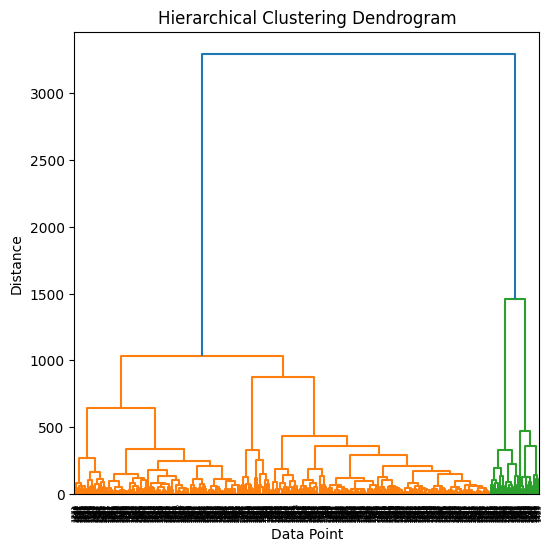

In [54]:
plt.figure(figsize=(6, 6))
dendrogram(values, orientation="top", labels=data1.index)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Point")
plt.ylabel("Distance")
plt.show()

In [55]:
data1['severity_level'] = severity_level
data1.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_21696\1934228931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['severity_level'] = severity_level


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,severity_level
0,6,148.0,72.0,35.000000,154.23783,33.6,0.627,50,1,Low
2,8,183.0,64.0,29.289634,154.23783,23.3,0.672,32,1,Low
4,0,137.0,40.0,35.000000,168.00000,43.1,2.288,33,1,Mild
6,3,78.0,50.0,32.000000,88.00000,31.0,0.248,26,1,Mild
8,2,197.0,70.0,45.000000,543.00000,30.5,0.158,53,1,High


In [56]:
data1['severity_level'].unique()

array(['Low', 'Mild', 'High', 'Moderate'], dtype=object)

In [57]:
data1['severity_level'].value_counts()

severity_level
Mild        509
Low         342
Moderate     60
High         41
Name: count, dtype: int64

In [ ]:
#Logistic Regression

In [58]:
x1 = data1.drop(['Outcome','severity_level'], axis = 1)
x1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,154.23783,33.6,0.627,50
2,8,183.0,64.0,29.289634,154.23783,23.3,0.672,32
4,0,137.0,40.0,35.000000,168.00000,43.1,2.288,33
6,3,78.0,50.0,32.000000,88.00000,31.0,0.248,26
8,2,197.0,70.0,45.000000,543.00000,30.5,0.158,53


In [60]:
label_encoder = LabelEncoder()
data1['Category_encoded'] = label_encoder.fit_transform(data1['severity_level'])


C:\Users\HP\AppData\Local\Temp\ipykernel_21696\287866166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Category_encoded'] = label_encoder.fit_transform(data1['severity_level'])


In [63]:
y1 = data1.drop(['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','severity_level'], axis=1)
y1.head()


,Category_encoded
0,1
2,1
4,2
6,2
8,0


In [64]:
data1['Category_encoded'].value_counts()

Category_encoded
2    509
1    342
3     60
0     41
Name: count, dtype: int64

In [65]:
a_train, a_test, b_train, b_test = train_test_split(x1,y1, test_size=0.30, random_state=42)

In [66]:
model1.fit(a_train, b_train)
lr_predic = model1.predict(a_test)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
print("Model Score is  :",model1.score(a_train,b_train)) 
print("ACC Score is : ",accuracy_score(b_test,lr_predic))
print("Test Accuracy {}".format(model1.score(a_test,b_test))) 

Model Score is  : 0.8438438438438438
ACC Score is :  0.8601398601398601
Test Accuracy 0.8601398601398601


In [68]:
cm_1 = confusion_matrix(b_test,lr_predic)
print(classification_report(b_test, lr_predic))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.75      0.80       106
           2       0.84      0.90      0.87       147
           3       1.00      1.00      1.00        17

    accuracy                           0.86       286
   macro avg       0.92      0.91      0.92       286
weighted avg       0.86      0.86      0.86       286



In [69]:
LRf_1 = f1_score(b_test, lr_predic, average='weighted') 
print ("F1_score is : ", LRf_1)

F1_score is :  0.8586864116275882


In [70]:
print(cm_1)

[[ 16   0   0   0]
 [  0  80  26   0]
 [  0  14 133   0]
 [  0   0   0  17]]


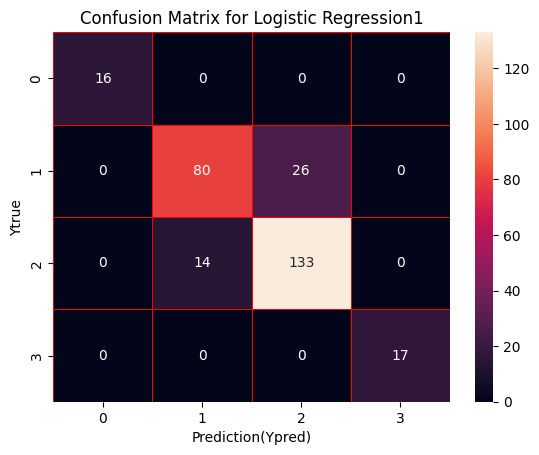

In [71]:
sns.heatmap(cm_1,annot = True, linewidths=0.5,linecolor="red",fmt=".0f")
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.title("Confusion Matrix for Logistic Regression1")
plt.show()